In [187]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sn

In [188]:
dtype = {'Point-ID': np.int32, 'Hole-ID': str, 'Sample': str, 'From': np.float64, 'To': np.float64, 
         'M': np.float64, 'Au': np.float64, 'Ag': np.float64, 'X': np.float64, 'Y': np.float64, 'Z': np.float64, 
         'Block': str, 'Date': str, 'S': np.float64, 'Fe': np.float64, 'Cu': np.float64, 
         'Zn': np.float64, 'As': np.float64, 'Cd': np.float64, 'Sb': np.float64, 'Pb': np.float64, 'Bi': np.float64, 
         'Au_eq': np.float64, 'Pb_eq': np.float64, 'Au_Cut': np.float64, 'Ag_Cut': np.float64, 'Pb_Cut': np.float64, 
         'Zn_Cut': np.float64, 'Cu_Cut': np.float64, 'As_Cut': np.float64, 'Sb_Cut': np.float64, 
         'RT_2021': str, 'Cd_Cut': np.float64, 'Bi_Cut': np.float64, 'Code': str, 
        'RT_2021_Бедные': str}
df = pandas.read_csv('DH_ASSAY_General_2021.csv', sep=';', header='infer', na_values='na', 
                     keep_default_na=True, na_filter=True, verbose=False, decimal=',', dtype=dtype,
                     usecols=['Au', 'Ag', 'S', 'Fe', 'Cu', 'Zn', 'As', 'Cd', 'Sb', 'Pb', 'Bi'])

In [189]:
df_s = df[df[['Ag', 'S', 'Fe', 'Cu', 'Sb', 'Pb', 'Bi']].notnull().all(1)]

df_data = df[['S', 'Ag', 'Fe', 'Cu', 'Sb', 'Pb', 'Bi']]

           S        Ag        Fe        Cu        Sb        Pb        Bi
S   1.000000  0.471403  0.593377  0.671405  0.441371  0.323197  0.524048
Ag  0.471403  1.000000  0.240161  0.471846  0.180363  0.782139  0.629066
Fe  0.593377  0.240161  1.000000  0.473259  0.131990  0.138613  0.296879
Cu  0.671405  0.471846  0.473259  1.000000  0.307534  0.245619  0.620367
Sb  0.441371  0.180363  0.131990  0.307534  1.000000  0.087515  0.181227
Pb  0.323197  0.782139  0.138613  0.245619  0.087515  1.000000  0.489687
Bi  0.524048  0.629066  0.296879  0.620367  0.181227  0.489687  1.000000


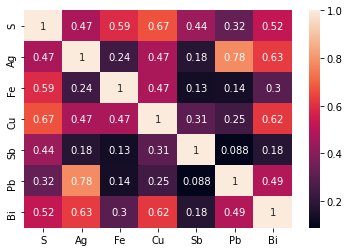

In [190]:
corrMatrix = df_data.corr()
print (corrMatrix)
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [191]:
def trainLinearRegression(X_train, y_train, X_test, y_test):
    print ('trainLinearRegression')
    regr = linear_model.LinearRegression()
    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print('Mean squared error: %.2f'
          % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
          % r2_score(y_test, y_pred))

    #print (df_data.shape)
    #na = df_data.shape[0] - df_data.dropna().shape[0]
    #print (na/df_data.shape[0]*100)
    #print (df_data.dropna())
    #print (y_test)
    #print (y_pred)
    #print (y_train.mean())

In [192]:
def trainLassoLars(X_train, y_train, X_test, y_test):
    print ('trainLassoLars')
    regr = linear_model.LassoLars()
    alphas = np.logspace(-4, -1, 6)
    scores = [regr.set_params(alpha=alpha)
                   .fit(X_train, y_train)
                   .score(X_test, y_test)
               for alpha in alphas]
    best_alpha = alphas[scores.index(max(scores))]
    regr.alpha = best_alpha
    regr.fit(X_train, y_train)
    # Make predictions using the testing set
    y_pred = regr.predict(X_test)
    #Lasso(alpha=0.025118864315095794)
    print(regr.coef_)
    # The mean squared error
    print('Mean squared error: %.2f'
          % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
          % r2_score(y_test, y_pred))

In [193]:
size = df_s.shape[0]

def predictLinear():
    mask = np.random.rand(size) < 0.8

    x = lambda df: df.columns != 'S'
    y = lambda df: df.columns == 'S'

    X_train = df_s.loc[:, x][mask]
    y_train = df_s.loc[:, y][mask]

    X_test = df_s.loc[:, x][~mask]
    y_test = df_s.loc[:, y][~mask]
    
    trainLinearRegression(X_train, y_train, X_test, y_test)
    trainLassoLars(X_train, y_train, X_test, y_test)

In [194]:
for i in range(10):
    predictLinear()

trainLinearRegression
Coefficients: 
 [[-1.82622938e-02  2.24445318e-03  3.41247927e-01  3.18000956e+00
   1.64747426e-01  1.14311306e-01  2.88072280e+01  1.42214627e+00
   1.70712737e-01  5.46825993e+01]]
Mean squared error: 2.15
Coefficient of determination: 0.70
trainLassoLars
[-9.85239907e-03  2.99448797e-03  3.35417282e-01  3.01386501e+00
  1.51950996e-01  7.93809726e-02  2.71935745e+01  1.38709522e+00
  1.45185331e-01  4.91537515e+01]
Mean squared error: 2.13
Coefficient of determination: 0.70
trainLinearRegression
Coefficients: 
 [[-6.79317236e-03  3.07530434e-03  3.41346773e-01  2.89779912e+00
   1.31634180e-01  1.04905674e-01  3.02900333e+01  1.43107404e+00
   1.66277376e-01  4.53160629e+01]]
Mean squared error: 2.29
Coefficient of determination: 0.68
trainLassoLars
[-1.16562606e-03  3.73542430e-03  3.34496839e-01  2.78227378e+00
  1.19817173e-01  7.53041894e-02  2.86324293e+01  1.39544629e+00
  1.42042221e-01  4.08416110e+01]
Mean squared error: 2.32
Coefficient of determinat